In [1]:
import os
import sys
from pathlib import Path
from typing import Sequence, Tuple, List, Dict, Set, Any, Optional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14

In [2]:
out_dir = Path('out')
os.makedirs(out_dir, exist_ok=True)


In [3]:
dataset_dir = Path(
    "/Users/avivr/dev/phd/proteins/out/prec-collected/"
    "20220413_114542-aida-ex_EC-src_EC-r1.8_s0.7"
)

meta_csv_path = dataset_dir / "meta-structs_filtered.csv"

df_meta = pd.read_csv(meta_csv_path, header=0,index_col=0)
df_meta

,pdb_id,ena_id,resolution,seq_len,description,src_org,host_org,ligands,r_free,r_work,space_group,cg_ph,cg_temp
unp_id,,,,,,,,,,,,,
P15005,6GCD:A,ENA|AAA24142|AAA24142.1,1.80,170,5-methylcytosine-specific restriction enzyme B,Escherichia coli,Escherichia coli str. K-12 substr. DH10B,"DT,DG,DC,5HC,CME,DA",0.21,0.17,P 21 21 21,5.5,293.0
P15005,6GCE:A,ENA|AAA24142|AAA24142.1,1.60,170,5-methylcytosine-specific restriction enzyme B,Escherichia coli,Escherichia coli str. K-12 substr. DH10B,"DT,5FC,DA,DG,DC",0.21,0.17,P 21 21 21,7.5,293.0
P15005,6GCF:A,ENA|AAA24142|AAA24142.1,1.55,170,5-methylcytosine-specific restriction enzyme B,Escherichia coli,Escherichia coli str. K-12 substr. DH10B,"DG,C34,DC,DA,DT",0.18,0.13,P 21 21 21,7.5,293.0
P14900,2JFG:A,ENA|CAA35933|CAA35933.1,1.52,445,UDP-N-ACETYLMURAMOYLALANINE--D-GLUTAMATE LIGASE,ESCHERICHIA COLI,Escherichia coli DH5[alpha],"UMA,SO4,ADP,KCX",0.21,0.19,P 41,7.5,NaN
P14900,2WJP:A,ENA|CAA35933|CAA35933.1,1.60,439,UDP-N-ACETYLMURAMOYLALANINE--D-GLUTAMATE LIGASE,ESCHERICHIA COLI DH5[ALPHA],ESCHERICHIA COLI DH5[ALPHA],"AZI,CL,D17,KCX,DMS,SO4",0.19,0.17,P 41,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0A7Y4,7VSD:A,ENA|AAA24565|AAA24565.1,1.70,155,Ribonuclease HI,Escherichia coli (strain K12),Escherichia coli,"MG,SO4",0.23,0.19,P 43 21 2,5.6,293.0
Q6EME5,7VW0:A,ENA|AAT37587|AAT37587.2,1.45,105,DUF305 domain-containing protein,Escherichia coli,Escherichia coli,NaN,0.20,0.15,P 21 21 21,NaN,289.0
G0ZGJ8,7Z2S:A,ENA|AEL12229|AEL12229.1,1.72,412,Acidphosphatase,Escherichia coli,Escherichia coli,"IHS,NI,K",0.21,0.15,P 1 21 1,6.5,289.0


In [4]:
data_csv_path = dataset_dir / "data-precs.csv"

df_data = pd.read_csv(data_csv_path, header=0,index_col=0,low_memory=False)
df_data

,unp_id,res_id,name,unp_idx,codon,codon_score,codon_opts,bfactor,secondary,phi,...,omega_std,backbone,contact_count,contact_types,contact_dmin,contact_dmax,contact_smin,contact_smax,contact_ooc,contact_non_aa
pdb_id,,,,,,,,,,,,,,,,,,,,,
6GCD:A,P15005,1,M,0.0,ATG,1.0,ATG,41.66,-,NaN,...,NaN,"[[17.956, 6.925, -36.644], [16.713, 7.379, -35...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6GCD:A,P15005,2,E,1.0,GAA,1.0,GAA,27.69,-,-73.36,...,NaN,"[[15.332, 6.719, -34.05], [14.712, 5.808, -33....",1,"hydrophobic,proximal",4.12,4.12,28.0,28.0,NaN,NaN
6GCD:A,P15005,3,S,2.0,TCT,1.0,TCT,24.27,-,-131.48,...,NaN,"[[13.323, 3.84, -33.269], [12.112, 3.187, -33....",1,vdw,3.33,3.33,2.0,2.0,NaN,NaN
6GCD:A,P15005,4,I,3.0,ATT,1.0,ATT,20.31,S,-84.76,...,NaN,"[[10.071, 2.65, -32.62], [9.283, 2.179, -31.49...",20,"CARBONPI,hydrophobic,polar,proximal,vdw,vdw_clash",2.96,4.50,3.0,137.0,NaN,NaN
6GCD:A,P15005,5,Q,4.0,CAA,1.0,CAA,19.89,H,-54.51,...,NaN,"[[9.26, 0.046, -32.766], [8.88, -1.361, -32.93...",4,"polar,proximal,vdw,vdw_clash",3.05,3.29,2.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7Z2W:A,G0ZGJ8,406,P,427.0,CCG,1.0,CCG,16.24,G,-55.11,...,NaN,"[[0.6903, -15.7453, 22.1976], [1.2725, -16.203...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7Z2W:A,G0ZGJ8,407,A,428.0,GCG,1.0,GCG,16.86,G,-65.35,...,NaN,"[[2.3005, -18.1143, 22.3063], [3.34, -19.1253,...",2,"polar,vdw_clash",3.04,3.17,2.0,2.0,NaN,NaN
7Z2W:A,G0ZGJ8,408,C,429.0,TGC,1.0,TGC,16.27,G,-96.93,...,NaN,"[[4.6886, -17.2616, 21.2985], [5.9157, -16.589...",7,"covalent,hydrophobic,polar,proximal,vdw,vdw_cl...",2.07,4.27,2.0,275.0,NaN,NaN


## Runs histogram

In [5]:

def count_runs(x: np.ndarray):
    """
    Counts runs of consecutive items in an array.
    
    Based on
    https://gist.github.com/alimanfoo/c5977e87111abe8127453b21204c1065
    """

    # ensure array
    x = np.asanyarray(x)
    if x.ndim != 1:
        raise ValueError('only 1D array supported')
    n = x.shape[0]

    # handle empty array
    if n == 0:
        return np.array([]), np.array([]), np.array([])

    # find run starts
    loc_run_start = np.empty(n, dtype=bool)
    loc_run_start[0] = True
    np.not_equal(x[:-1], x[1:], out=loc_run_start[1:])
    run_starts = np.nonzero(loc_run_start)[0]

    # find run values
    run_values = x[loc_run_start]

    # find run lengths
    run_lengths = np.diff(np.append(run_starts, n))

    return run_values, run_starts, run_lengths
    
def count_runs_for_value(x: np.ndarray, val):
    """
    
    input: [1,1,0,2,2,0,0,0,3,3,3,0,0,0,4,4]
    output: {0: 9, 1: 1, 2: 0, 3:, 2}
    
    :returns: Dict from run length (including zero) to number of times this run-length exists.
    """
    
    run_values, run_starts, run_lengths = count_runs(x)
    n = len(x)
    
    # Get run lengths for the requested value
    run_lengths_for_value = run_lengths[run_values == val]

    # Contatentate zeros to count also zero-length runs
    run_lengths_for_value = np.concatenate(
        [run_lengths_for_value, np.zeros(n - np.sum(run_lengths_for_value))],
        axis=0
    )
    
    longest_run = np.max(run_lengths_for_value)
    hist_counts, hist_bins = np.histogram(run_lengths_for_value, bins=np.arange(longest_run + 2, dtype=int), density=False,)

    hist_dict = {
        run_len: run_len_count
        for run_len, run_len_count in zip(hist_bins, hist_counts)
    }
    
    return hist_dict

In [6]:
df_pdb_groups = df_data.groupby(by='pdb_id')

run_lengths_all_structs = {}
for i, (group_name, df_group) in enumerate(df_pdb_groups):
    # filter out non-standard AAs
    idx_standard_aas = df_group['name'] != "X"
    contact_count = df_group[idx_standard_aas]['contact_count'].values
    run_lengths = count_runs_for_value(contact_count, val=0)
    
    for run_length, run_count in run_lengths.items():
        run_lengths_all_structs.setdefault(run_length, 0)
        run_lengths_all_structs[run_length] += run_count

print(f"{run_lengths_all_structs=}")

run_lengths_all_structs={0: 335345, 1: 14622, 2: 1338, 3: 183, 4: 38, 5: 7, 6: 1, 7: 1}


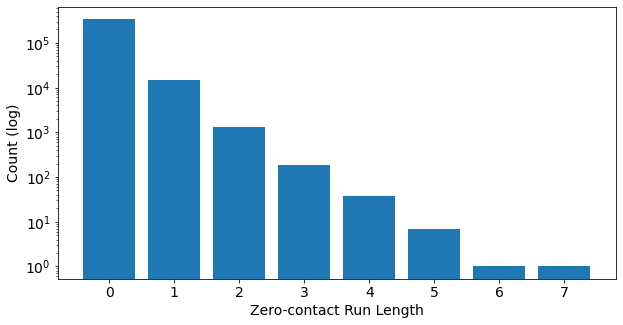

In [7]:
run_lengths = np.array(list(run_lengths_all_structs.keys()))
run_counts = np.array(list(run_lengths_all_structs.values()))

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(x=run_lengths, height=run_counts)
ax.set_yscale("log")
ax.set_xlabel("Zero-contact Run Length")
ax.set_ylabel("Count (log)");

## Contact Windows

In [8]:
from pp5.codons import ACIDS, CODONS

ACIDS = set(ACIDS)
CODONS = set(CODONS)

def extract_non_contact_windows(
    df_struct: pd.DataFrame,
    win_context_len: int = 1,
    smax_thresh: int = 4,
    verbose: int = 0,
) -> Sequence[pd.DataFrame]:
    
    # Make sure the dataframe contains data from a single PDB ID,
    # and make sure that the pdb_id column is the index.
    df_struct = df_struct.reset_index()
    pdb_id = df_struct['pdb_id'][0]
    assert all(pdb_id == df_struct['pdb_id'])
    df_struct = df_struct.set_index('pdb_id')
    
    # Impute NaN values where contact count is zero
    idx_no_contact = (df_struct['contact_count'] == 0)
    df_struct.loc[idx_no_contact,['contact_smax', 'contact_smin']] = 0
    
    # Total number of residues
    n = len(df_struct)
    
    # Window length in AAs: [left_context], AA1, AA2, [right_context]
    win_center_len = 2
    win_len = win_center_len + 2 * win_context_len
    
    # Costruct sliding-window indexes of the right length
    sliding_window_idxs = zip(
        *[
            range(offset, n)
            for offset in range(win_len)
        ]
    )
    
    windows = []
    for offset, window_idx in enumerate(sliding_window_idxs):
        # Pandas can only slice with lists, not tuples
        window_idx = list(window_idx)
        df_window = df_struct.iloc[window_idx, :]
        
        # Make sure window contains consecutive residues
        try:
            window_res_ids = df_window['res_id'].values.astype(int)
        except ValueError:
            if verbose and offset % win_len == 0:
                print(f"{pdb_id}@{offset}: non-integer residue id in {df_window['res_id'].values}")
            continue
            
        if not np.all(np.diff(window_res_ids) == 1):
            if verbose:
                print(f"{pdb_id}@{offset}: non-consecutive residue ids in {window_res_ids}")
            continue
        
        # Exclude if window contains non-standard AAs
        if not np.all(df_window['name'].isin(ACIDS)):
            if verbose and offset % win_len == 0:
                print(f"{pdb_id}@{offset}: non-standard residues in {df_window['name'].values}")
            continue
        
        # Exclude if it has any out-of chain contacts
        if not np.all(df_window['contact_ooc'].isna()):
            if verbose and offset % win_len == 0:
                print(f"{pdb_id}@{offset}: OOC contacts in {df_window['contact_ooc'].values}")
            continue
            
        # Exclude if it has any non-AA contacts
        if not np.all(df_window['contact_non_aa'].isna()):
            if verbose and offset % win_len == 0:
                print(f"{pdb_id}@{offset}: Non-AA contacts in {df_window['contact_non_aa'].values}")
            continue
        
        # Extract window center
        df_window_center = df_window.iloc[win_context_len:-win_context_len,:]
        assert len(df_window_center) == win_center_len
        
        # Exclude if center AAs have missing or ambiguous codons
        window_center_codon_score = df_window_center['codon_score'].values.astype(float)
        if not np.all(window_center_codon_score == 1.0):
            if verbose and offset % win_center_len == 0:
                print(f"{pdb_id}@{offset}: Rejected due to missing codons: {window_center_codon_score}")
            continue
        
        # Exclude if center AAs have smax > thresh
        window_center_smax = df_window_center['contact_smax'].values
        if np.any(np.isnan(window_center_smax) | (window_center_smax > smax_thresh)):
            if verbose > 1 and offset % win_center_len == 0:
                print(f"{pdb_id}@{offset}: Rejected due to smax: {window_center_smax}")
            continue
       
        windows.append(df_window)
    
    if not windows:
        return pd.DataFrame()
    
    # The output dataframe will have a multi-index (pdb_id, window_id) and rows will correspond to residues in the window
    df_windows = pd.concat({i: win for i, win in enumerate(windows)}, axis=0, names=["window_id"])
    df_windows = df_windows.reorder_levels(['pdb_id', 'window_id'])
    return df_windows

In [9]:
df_pdb_groups = df_data.groupby(by='pdb_id')

pdb_id = "6RUM:A"
df_6gcd = df_pdb_groups.get_group(pdb_id)
df_6gcd.reset_index()['pdb_id'][0]

'6RUM:A'

In [10]:
window_df = extract_non_contact_windows(df_6gcd, win_context_len=1, smax_thresh=4, verbose=2)
print(f"\nnum_windows={len(set(window_df.index))}")

6RUM:A@0: Rejected due to missing codons: [0. 0.]
6RUM:A@2: Rejected due to missing codons: [1. 0.]
6RUM:A@4: Rejected due to missing codons: [0. 0.]
6RUM:A@6: Rejected due to missing codons: [0. 0.]
6RUM:A@8: Rejected due to missing codons: [0. 0.]
6RUM:A@10: Rejected due to missing codons: [0. 0.]
6RUM:A@12: Rejected due to missing codons: [0. 0.]
6RUM:A@14: Rejected due to missing codons: [0. 0.]
6RUM:A@16: Rejected due to missing codons: [0. 0.]
6RUM:A@18: Rejected due to missing codons: [0. 0.]
6RUM:A@20: Rejected due to missing codons: [0. 1.]
6RUM:A@22: Rejected due to missing codons: [1. 0.]
6RUM:A@24: Rejected due to missing codons: [0. 0.]
6RUM:A@26: Rejected due to missing codons: [0. 1.]
6RUM:A@28: Rejected due to missing codons: [0.   0.75]
6RUM:A@30: Rejected due to missing codons: [0. 0.]
6RUM:A@32: Rejected due to missing codons: [0. 0.]
6RUM:A@34: Rejected due to missing codons: [0. 0.]
6RUM:A@36: Rejected due to missing codons: [0. 0.]
6RUM:A@38: Rejected due to missi

In [11]:
window_df

unp_id res_id name  unp_idx codon  codon_score codon_opts  \
pdb_id window_id                                                              
6RUM:A 0          P0ABQ4    159    C     84.0   TGT          1.0        TGT   
       0          P0ABQ4    160    G     85.0   GGT          1.0        GGT   
       0          P0ABQ4    161    D     86.0   GAC          1.0        GAC   
       0          P0ABQ4    162    V     87.0   GTA          1.0        GTA   
       1          P0ABQ4    202    Y    127.0   TAC          1.0        TAC   
       1          P0ABQ4    203    E    128.0   GAG          1.0        GAG   
       1          P0ABQ4    204    P    129.0   CCG          1.0        CCG   
       1          P0ABQ4    205    D    130.0   GAT          1.0        GAT   
       2          P0ABQ4    203    E    128.0   GAG          1.0        GAG   
       2          P0ABQ4    204    P    129.0   CCG          1.0        CCG   
       2          P0ABQ4    205    D    130.0   GAT          1.0        GAT   
       2          P0ABQ4    206    D    131.0   GAC          1.0        GAC   
       3          P0ABQ4    217    A    142.0   GCT          1.0        GCT   
       3          P0ABQ4    218    D    143.0   GAT          1.0        GAT   
       3          P0ABQ4    219    A    144.0   GCG          1.0        GCG   
       3          P0ABQ4    220    Q    145.0   CAG          1.0        CAG   

                  bfactor secondary     phi  ...  omega_std  \
pdb_id window_id                             ...              
6RUM:A 0            20.73         T  -77.32  ...        NaN   
       0            25.98         -   68.27  ...        NaN   
       0            30.54         S  -88.11  ...        NaN   
       0            21.04         - -119.16  ...        NaN   
       1            29.36         -  -84.62  ...        NaN   
       1            37.48         -  -98.87  ...        NaN   
       1            40.65         G  -57.91  ...        NaN   
       1            43.91         G  -65.98  ...        NaN   
       2            37.48         -  -98.87  ...        NaN   
       2            40.65         G  -57.91  ...        NaN   
       2            43.91         G  -65.98  ...        NaN   
       2            33.15         G  -82.40  ...        NaN   
       3            20.21         -  -53.92  ...        NaN   
       3            23.64         - -140.56  ...        NaN   
       3            26.93         S  -65.13  ...        NaN   
       3            23.69         S -103.38  ...        NaN   

                                                           backbone  \
pdb_id window_id                                                      
6RUM:A 0          [[10.07, -2.166, 27.818], [10.491, -2.587, 26....   
       0          [[12.062, -4.053, 27.66], [12.983, -5.162, 27....   
       0          [[14.983, -5.988, 26.706], [16.27, -5.914, 26....   
       0          [[15.736, -4.902, 23.882], [15.49, -4.878, 22....   
       1          [[14.38, 20.935, 18.097], [15.696, 20.337, 17....   
       1          [[17.888, 21.026, 17.201], [18.852, 21.78, 16....   
       1          [[18.964, 21.276, 13.995], [19.367, 20.428, 12...   
       1          [[21.664, 21.2, 13.217], [23.118, 21.087, 13.1...   
       2          [[17.888, 21.026, 17.201], [18.852, 21.78, 16....   
       2          [[18.964, 21.276, 13.995], [19.367, 20.428, 12...   
       2          [[21.664, 21.2, 13.217], [23.118, 21.087, 13.1...   
       2          [[22.931, 19.583, 15.054], [23.363, 18.51, 15....   
       3          [[3.269, 15.504, -3.986], [1.824, 15.37, -3.87...   
       3          [[0.331, 13.719, -4.844], [-0.291, 12.964, -5....   
       3          [[-2.431, 11.871, -6.288], [-3.874, 11.695, -6...   
       3          [[-3.362, 10.625, -4.018], [-3.665, 10.163, -2...   

                  contact_count  \
pdb_id window_id                  
6RUM:A 0                      6   
       0                      2   
       0                      0   
      

In [12]:
from tqdm.auto import tqdm
from itertools import product

df_pdb_groups = df_data.groupby(by='pdb_id')

win_context_lengths = [1,2,3]
smax_thresholds = [2,3,4,5]

config_window_counts = []

for win_context_len, smax_thresh in tqdm(
    iterable=list(product(win_context_lengths, smax_thresholds)),
    desc="window configurations",
    unit="configs",
):
    
    with tqdm(total=len(df_pdb_groups), unit=" structs") as pbar:
        pbar.set_description(f"{win_context_len=}, {smax_thresh=}")

        window_dfs_all_structs = []
        n_total_windows = 0

        for i, (pdb_id, df_group) in enumerate(df_pdb_groups):
            window_df = extract_non_contact_windows(
                df_group,
                win_context_len=win_context_len,
                smax_thresh=smax_thresh,
                verbose=False
            )
            n_windows = len(set(window_df.index))
            n_total_windows += n_windows
            window_dfs_all_structs.append(window_df)

            pbar.set_postfix(dict(pdb_id=pdb_id, n_windows=n_windows, n_total_windows=n_total_windows))
            pbar.update()
            # if i>10:
            #     break

        df_all_windows = pd.concat(window_dfs_all_structs, axis=0)
        df_all_windows.to_csv(f'out/contact_windows-context={win_context_len}-smax={smax_thresh}.csv')
    
    config_window_counts.append(dict(
        win_context_len=win_context_len,
        smax_thresh=smax_thresh,
        n_total_windows=n_total_windows,
    ))
    
df_window_counts = pd.DataFrame(config_window_counts)
df_window_counts.to_csv('out/contact_windows-counts.csv', index=False)
df_window_counts

window configurations:   0%|          | 0/12 [00:00<?, ?configs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

  0%|          | 0/1326 [00:00<?, ? structs/s]

,win_context_len,smax_thresh,n_total_windows
0,1,2,69
1,1,3,129
2,1,4,314
3,1,5,357
4,2,2,62
5,2,3,115
6,2,4,295
7,2,5,336
8,3,2,55
9,3,3,105
